<a href="https://colab.research.google.com/github/Maraudier/tkfruit/blob/team-model-testing/v3Inception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Obtain your Kaggle token. 
token = {"username":"lightshift","key":"b7ab47deb22bd26d7cb071a39c232d1c"}
#some Colab and Kaggle set up
from google.colab import files
!pip install kaggle
!mkdir .kaggle
!mkdir ~/.kaggle
import json 
with open('/content/.kaggle/kaggle.json', 'w') as file:
  json.dump(token, file)
!chmod 600 /content/.kaggle/kaggle.json
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}
!kaggle datasets download -d sriramr/fruits-fresh-and-rotten-for-classification -p /content
!unzip \*.zip
!rm -rf /content/dataset/dataset/
!ls

- path is now set to: {/content}
100% 3.57G/3.58G [01:08<00:00, 37.9MB/s]
100% 3.58G/3.58G [01:08<00:00, 56.0MB/s]
Archive:  fruits-fresh-and-rotten-for-classification.zip
  inflating: dataset/dataset/test/freshapples/Screen Shot 2018-06-08 at 4.59.44 PM.png  
  inflating: dataset/dataset/test/freshapples/Screen Shot 2018-06-08 at 5.01.15 PM.png  
  inflating: dataset/dataset/test/freshapples/Screen Shot 2018-06-08 at 5.01.22 PM.png  
  inflating: dataset/dataset/test/freshapples/Screen Shot 2018-06-08 at 5.01.41 PM.png  
  inflating: dataset/dataset/test/freshapples/Screen Shot 2018-06-08 at 5.02.43 PM.png  
  inflating: dataset/dataset/test/freshapples/Screen Shot 2018-06-08 at 5.03.40 PM.png  
  inflating: dataset/dataset/test/freshapples/Screen Shot 2018-06-08 at 5.04.16 PM.png  
  inflating: dataset/dataset/test/freshapples/Screen Shot 2018-06-08 at 5.04.24 PM.png  
  inflating: dataset/dataset/test/freshapples/Screen Shot 2018-06-08 at 5.05.34 PM.png  
  inflating: dataset/datase

In [3]:

#Tensorflow set up and imports
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
import pathlib
import matplotlib.pyplot as plt
import os
from tensorflow.keras import datasets, layers, models
AUTOTUNE = tf.data.experimental.AUTOTUNE
from __future__ import absolute_import, division, print_function, unicode_literals

import IPython.display as display
from PIL import Image

train_dir = pathlib.Path('dataset/train')
test_dir = pathlib.Path('dataset/test')

TensorFlow 2.x selected.


In [0]:
total_images = len(list(train_dir.glob('*/*.png'))) +len(list(test_dir.glob('*/*.png')))
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
BATCH_SIZE = 128
#V3 Inception base size is 299
IMG_W = 299
IMG_H = 299
EPOCH_STEPS = np.ceil(total_images/BATCH_SIZE)

In [5]:

train_data_gen = train_generator.flow_from_directory(directory=str(train_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_H, IMG_W),
                                                     class_mode="sparse")
test_data_gen = test_generator.flow_from_directory(directory=str(test_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_H, IMG_W),
                                                     class_mode="sparse")

Found 10901 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.


In [6]:
model = tf.keras.applications.InceptionV3()
new = model.input
hidden_layer = model.layers[-1].output

collected_model = tf.keras.Model(new, hidden_layer)
collected_model.summary()

96116736/96112376 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_____________________________

In [7]:
collected_model.compile(optimizer='adam',
                                     loss='sparse_categorical_crossentropy',
                                     metrics=['accuracy'])

history = collected_model.fit_generator(
    train_data_gen,
    epochs=10,
    validation_data=test_data_gen)


Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 86 steps, validate for 22 steps
Epoch 1/10
86/86 [==============================] - 305s 4s/step - loss: 0.2699 - accuracy: 0.9446 - val_loss: 6.5030 - val_accuracy: 0.1727
Epoch 2/10
86/86 [==============================] - 283s 3s/step - loss: 0.0510 - accuracy: 0.9840 - val_loss: 2.5568 - val_accuracy: 0.6464
Epoch 3/10
86/86 [==============================] - 283s 3s/step - loss: 0.0255 - accuracy: 0.9922 - val_loss: 0.6039 - val_accuracy: 0.8643
Epoch 4/10
86/86 [==============================] - 283s 3s/step - loss: 0.0128 - accuracy: 0.9962 - val_loss: 0.0967 - val_accuracy: 0.9626
Epoch 5/10
86/86 [==============================] - 282s 3s/step - loss: 0.0243 - accuracy: 0.9925 - val_loss: 1.2656 - val_accuracy: 0.7917
Epoch 6/10
86/86 [==============================] - 282s 3s/step - loss: 0.0293 - accuracy: 0.9909 - val_loss: 0.4450 - val_acc

NameError: ignored

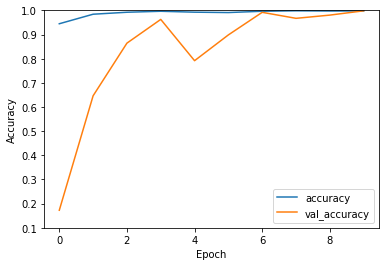

In [8]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.1, 1])
plt.legend(loc='lower right')
test_loss, test_acc = collected_model.evaluate(test_data_gen, verbose=2)

In [0]:
print("Val  Accuracy :", (history.history['val_accuracy'])
print("Accuracy :", (history.history['accuracy'])
print("Loss: ", history.loss)

In [0]:
#Lets Deploy it!
from keras.layers.core import K
from tensorflow.python.saved_model import builder as saved_model_builder
 
 K.set_learning_phase(0)
 config = collected_model.get_config()
 weights = collected_model.get_weights()
 fruitv3_model = Sequential.from_config(config)
 fruitv3_model.set_weights(weights)
 
 builder = saved_model_builder.SavedModelBuilder(export_path)
 signature = predict_signature_def(inputs={'input': fruitv3_model.inputs[0]}, 
                                   outputs={'output': fruitv3_model.outputs[0]})
 
 
 with K.get_session() as sess:
 
 builder.add_meta_graph_and_variables(
 sess=sess,
 tags=[tag_constants.SERVING],
 clear_devices = True,
 signature_def_map={signature_constants.DEFAULT_SERVING_SIGNATURE_DEF_KEY: signature})
 builder.save()